# Suzuki-Miyaura Coupling

Suzuki-Miyaura coupling is a popular and widely used chemical reaction that allows for the formation of carbon-carbon (C-C) bonds between aryl or vinyl halides and boronic acids or boronate esters. This reaction is a type of cross-coupling reaction, which involves the merging of two different organic molecules to create a new compound with a C-C bond (Scheme 1).


<div>
    <img src="Suzuki_coupling_scheme.jpg" width="800"/>
    <figcaption> Scheme 1. Suzuki-Miyaura coupling reaction scheme.</figcaption>
</div>

The Suzuki-Miyaura coupling reaction was first reported by Akira Suzuki and Norio Miyaura in the 1970s and has since become a fundamental tool in organic synthesis, particularly in the field of medicinal chemistry and materials science. It is known for its mild reaction conditions, high functional group tolerance, and broad substrate scope, making it applicable to a wide range of organic molecules.
The reaction typically involves the use of a palladium catalyst, along with a base and a source of boron, such as a boronic acid or boronate ester. The reaction proceeds through a transmetalation step, where the palladium catalyst facilitates the transfer of an aryl or vinyl group from the boron source to the halide substrate, forming a C-C bond in the process.
The Suzuki-Miyaura coupling reaction has been used in the synthesis of numerous complex organic molecules, including natural products, pharmaceuticals, and functional materials. It has enabled chemists to efficiently create C-C bonds in a controlled and selective manner, making it a valuable tool in modern organic chemistry.

# Notebook Structure
1. Dataset Preparation and Exploration
2. PCA and Clustering based on Chemical Similarity
3. Suzuki-Miyaura Coupling Reaction Prediction - Regression Approach
4. Conclusions

# 1. Dataset Preparation and Exploration
The database was built from various literature data (which can be tracked in the `article` column) with the following instances:

- **solvent_names**: a field to store the names of the solvents used in a chemical reaction.
- **solvent_class**: a field to store the class of the solvents used in a chemical reaction, such as polar or nonpolar.
- **base_names**: a field to store the names of the bases used in a chemical reaction.
- **base_class**: a field to store the class of the bases used in a chemical reaction, such as strong or weak.
- **temperature**: a field to store the temperature at which the chemical reaction was performed in $^\circ$ C.
- **ligand**: a field to store the type of ligand used in the chemical reaction.
- **Pd source**: a field to store the source of Pd catalyst used in the chemical reaction.
- **yield**: a field to store the yield of the chemical reaction.
- **article**: a field to store the article/literature reference where the reaction was reported.
- **reaction_smiles**: a field to store the SMILES notation for the chemical reaction.
- **boronate**: a field to store the SMILES notation for the boronate compound used in the chemical reaction.
- **bromide**: a field to store the SMILES notation for the bromide compund used in the chemical reaction.
- **condition_string**: a field to store a string representing the reaction conditions (solvent, base and ligand).

This type of database is used to store and organize information about a set of chemical reactions, such as the conditions under which the reactions were performed, the reactants and catalysts used, and the yields of the reactions. 

SMILES (Simplified Molecular Input Line Entry System) is a notation for describing the structure of a molecule using a simple ASCII string. Each atom in a SMILES string is represented by a symbol, such as C for carbon, N for nitrogen, and O for oxygen, and the bonds between atoms are represented by characters such as "-" for single bonds, "=" for double bonds, and "#" for triple bonds. This notation can be read by the `rdkit` package.

The original database can be found in the `open_reaction_database_files` folder of the following repository.
N. H. Angello et al., Closed-loop optimization of general conditions for heteroaryl Suzuki coupling, version 0.1.2, Zenodo (2022); https://doi.org/10.5281/zenodo.7099435


### Literature Data

I will use the following packages to analyse and pre-process the dataset obtained from the literature:
- Numpy: for numerical computation
- Pandas: for data manipulation and analysis
- rdkit: for cheminformatics

In [1]:
import rdkit
import numpy as np
import pandas as pd

Before visualising the dataset, let's define a function which gives information about the dataframe such as shape, data types, missing values and number of unique values in each column. This function will be useful to get a quick overview of the datasets used in the repo.

In [2]:
def data_details(df):
    print("Shape of the dataframe is: ", df.shape)
    print("Data types of the dataframe are: ", df.dtypes)
    print("Null values in the dataframe are: ", df.isnull().sum())
    print("Number of unique values in each column are: ", df.nunique())

In [3]:
lit_data = pd.read_csv('Literature Data_colon_delimited.csv',sep=";",engine='python')
lit_data.head()

,Unnamed: 0,solvent_names,solvent_class,base_names,base_class,temperature,ligand,Pd source,yield,article,reaction_smiles,boronate,bromide,condition_string
0,38,"N,N-dimethyl-formamide,,water",polar,potassium phosphate,phosphate,80,PPh3,Pd[P(Ph)3]4,69.0,"Article; Delaunay, Thierry; Genix, Pierre; Es-...",COC1=CC=C(C=C1)N1N=C(Br)C=C1I.OB(O)C1=CC=NC=C1...,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,"DMF:water,,K3PO4,,PPh3"
1,54,"N,N-dimethyl-formamide,,water",polar,sodium carbonate,carbonate,100,PPh3,Pd[P(Ph)3]4,3.0,"Article; Ramachandran, Sreekanth A.; Jadhavar,...",OB(O)C1=CN=C2NC=CC2=C1.NC1=NC2=C(CC(CC2)N2N=C(...,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,"DMF:water,,Na2CO3,,PPh3"
2,57,"1,4-dioxane,,water",waterEther,potassium phosphate,phosphate,100,dppf,Pd(dppf)Cl2,3.0,"Article; Ho, Soo Yei; Wang, Weiling; Ng, Fui M...",CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O...,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,"1,4-dioxane:water,,K3PO4,,dppf"
3,89,"1,4-dioxane,,water",waterEther,sodium carbonate,carbonate,125,PPh3,Pd[P(Ph)3]4,82.0,"Article; Pettus, Liping H.; Xu, Shimin; Cao, G...",CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2.CC1=C(C=CC=C1)...,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,"1,4-dioxane:water,,Na2CO3,,PPh3"
4,99,"N,N-dimethyl-formamide,,water",polar,sodium carbonate,carbonate,140,PPh3,Pd[P(Ph)3]4,91.0,"Article; Srour, Hassan; Doan, Thu-Hong; Silva,...",OB(O)C1=CC=CS1.CCCCCCN1C2=C(C=C(C(Br)=C2)N(=O)...,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,"DMF:water,,Na2CO3,,PPh3"


In [4]:
data_details(lit_data)

Shape of the dataframe is:  (1034, 14)
Data types of the dataframe are:  Unnamed: 0            int64
solvent_names        object
solvent_class        object
base_names           object
base_class           object
temperature           int64
ligand               object
Pd source            object
yield               float64
article              object
reaction_smiles      object
boronate             object
bromide              object
condition_string     object
dtype: object
Null values in the dataframe are:  Unnamed: 0          0
solvent_names       0
solvent_class       0
base_names          0
base_class          0
temperature         0
ligand              0
Pd source           0
yield               0
article             0
reaction_smiles     0
boronate            0
bromide             0
condition_string    0
dtype: int64
Number of unique values in each column are:  Unnamed: 0          1034
solvent_names          3
solvent_class          3
base_names             2
base_class          

From the `data_details(df)` we can see that there are 1034 instances.
There are few steps to follow to preprocess the data:
1. Rename the columns to make them more readable from the code
2. Remove the extra comma in the `solvent_names` column

In [5]:
lit_data = lit_data.rename({'Pd source':'pd_source'},axis='columns') #rename the column `Pd source`, otherwise it will mess-up the code
lit_data = lit_data.rename({'bromide':'halide'},axis='columns') #it is more correct to refer to these compounds as halide species
lit_data = lit_data.replace(",,", ",", regex=True) #there was an extra comma in two fields of the dataset
lit_data.head()

,Unnamed: 0,solvent_names,solvent_class,base_names,base_class,temperature,ligand,pd_source,yield,article,reaction_smiles,boronate,halide,condition_string
0,38,"N,N-dimethyl-formamide,water",polar,potassium phosphate,phosphate,80,PPh3,Pd[P(Ph)3]4,69.0,"Article; Delaunay, Thierry; Genix, Pierre; Es-...",COC1=CC=C(C=C1)N1N=C(Br)C=C1I.OB(O)C1=CC=NC=C1...,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,"DMF:water,K3PO4,PPh3"
1,54,"N,N-dimethyl-formamide,water",polar,sodium carbonate,carbonate,100,PPh3,Pd[P(Ph)3]4,3.0,"Article; Ramachandran, Sreekanth A.; Jadhavar,...",OB(O)C1=CN=C2NC=CC2=C1.NC1=NC2=C(CC(CC2)N2N=C(...,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,"DMF:water,Na2CO3,PPh3"
2,57,"1,4-dioxane,water",waterEther,potassium phosphate,phosphate,100,dppf,Pd(dppf)Cl2,3.0,"Article; Ho, Soo Yei; Wang, Weiling; Ng, Fui M...",CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O...,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,"1,4-dioxane:water,K3PO4,dppf"
3,89,"1,4-dioxane,water",waterEther,sodium carbonate,carbonate,125,PPh3,Pd[P(Ph)3]4,82.0,"Article; Pettus, Liping H.; Xu, Shimin; Cao, G...",CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2.CC1=C(C=CC=C1)...,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,"1,4-dioxane:water,Na2CO3,PPh3"
4,99,"N,N-dimethyl-formamide,water",polar,sodium carbonate,carbonate,140,PPh3,Pd[P(Ph)3]4,91.0,"Article; Srour, Hassan; Doan, Thu-Hong; Silva,...",OB(O)C1=CC=CS1.CCCCCCN1C2=C(C=C(C(Br)=C2)N(=O)...,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,"DMF:water,Na2CO3,PPh3"


The dataset is based on 1034 literature references and it does not contain missing values.
The values of the dataset are mostly objects which should be converted to floats or chemical SMILES, otherwise it is not possible to further analyse the data.
What are the missing details in this dataframe?
1. Solvent SMILES
2. Ligands SMILES
3. Pd catalyst SMILES
4. Base SMILES
5. Products SMILES

So, the first step is to check the unique values of the correspondning columns.

Before substituting the chemicals' names with their SMILES, let's check the unique values of the columns which contain the names of the chemicals to monitor if there are any typos or redundant names.

In [6]:
print("Unique values for solvent name:",lit_data.solvent_names.unique())
print("Unique values for catalyst used:",lit_data.pd_source.unique())
print("Unique values for ligand used:",lit_data.ligand.unique())
print("Unique values for base name:",lit_data.base_names.unique())
print("Unique values for temperature:",lit_data.temperature.unique())

Unique values for solvent name: ['N,N-dimethyl-formamide,water' '1,4-dioxane,water' 'toluene,water']
Unique values for catalyst used: ['Pd[P(Ph)3]4' 'Pd(dppf)Cl2' 'palladium diacetate' 'Pd[P(Ph)3]2Cl2'
 'Pd2(dba)3'
 'chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl?)]palladium(II)'
 'chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II)'
 'XPhos-Pd-G2' 'PdCl2[P(tBu)2(p-Me2NC6H4)]2'
 '(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1 ?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II) methanesulfonate']
Unique values for ligand used: ['PPh3' 'dppf' 'P(cychex)3' 'PtBu3' ',xphos' 'SPhos' ',PtBu3']
Unique values for base name: ['potassium phosphate' 'sodium carbonate']
Unique values for temperature: [ 80 100 125 140  95  20  50 110  75 120  90  60 130  45 150  85  70  25
 105  91  65]


In the `pd_source` column the `chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl?)]palladium(II)` and `chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II)` are the same, so we can substitute the second one with the first one. Before the convertion of the chemicals' names to their corresponding SMILEs, we can check the number of times that certain catalysts are used in the dataset. The following code shows the most used catalysts in the `lit_data` dataframe. 

In [7]:
def catalyst_count(df):
    catalyst_count = df['pd_source'].value_counts()
    return catalyst_count
catalyst_count(lit_data)

Pd[P(Ph)3]4                                                                                                                 688
Pd[P(Ph)3]2Cl2                                                                                                              185
Pd2(dba)3                                                                                                                    54
palladium diacetate                                                                                                          41
Pd(dppf)Cl2                                                                                                                  30
chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl?)]palladium(II)                27
chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II)                  4
PdCl2[P(tBu)2(p-Me2NC6H4)]2                                                                             

I am dealing with two different datasets. The following code is in place to clean the `lit_data` dataframe and make some chemicals' names more readable.

In [8]:
#substitute 'PtBu3' with 'P(tBu)3' in ligand column
lit_data['ligand'] = lit_data['ligand'].replace('PtBu3', 'P(tBu)3')

#substitute 'P(cychex)3' with 'Pcy3' in ligand column
lit_data['ligand'] = lit_data['ligand'].replace('P(cychex)3', 'Pcy3')

#substitute ',xphos' with 'XPhos' in ligand column
lit_data['ligand'] =lit_data['ligand'].replace(',xphos', 'XPhos')

#substitute 'XPhos-Pd-G2', 'chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II)' and  'chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl?)]palladium(II)' with XantPhosPdG2
lit_data['ligand'] = lit_data['ligand'].replace('XPhos-Pd-G2', 'XantPhosPdG2')
lit_data['pd_source'] = lit_data['pd_source'].replace('chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II)', 'XantPhosPdG2')
lit_data['pd_source'] = lit_data['pd_source'].replace('chloro(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1?-biphenyl)[2-(2?-amino-1,1?-biphenyl?)]palladium(II)', 'XantPhosPdG2')

#substitute 'Pd[P(Ph)3]4' with 'Pd(PPh3)4'
lit_data['pd_source'] = lit_data['pd_source'].replace('Pd[P(Ph)3]4', 'Pd(PPh3)4')

#substitute 'Pd[P(Ph)3]2Cl2' with 'PdCl2(PPh3)2'
lit_data['pd_source'] = lit_data['pd_source'].replace('Pd[P(Ph)3]2Cl2', 'PdCl2(PPh3)2')

#substitute 'palladium diacetate' with 'Pd(acac)2'
lit_data['pd_source'] = lit_data['pd_source'].replace('palladium diacetate', 'Pd(acac)2')

#substitute '(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1 ?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II) methanesulfonate' with 'XPhosPdG3'
lit_data['pd_source'] = lit_data['pd_source'].replace('(2-dicyclohexylphosphino-2?,4?,6?-triisopropyl-1,1 ?-biphenyl)[2-(2?-amino-1,1?-biphenyl)]palladium(II) methanesulfonate', 'XPhosPdG3')

Now it is time to get the SMILES of the chemicals. The SMILES were taken from sigmaaldrich.com in the properties window of the corresponding compound (refer to SMILES string in the website).

In [9]:
def get_ligand_smiles(x):
    if x['ligand'] == 'PPh3':
        return 'c1ccc(cc1)[24P](c1ccccc1)c1ccccc1'
    elif x['ligand'] == 'dppf':
        return '[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1'
    elif x['ligand'] == 'Pcy3':
        return '[14P](C1CCCCC1)(C1CCCCC1)C1CCCCC1'
    elif x['ligand'] == 'P(tBu)3':
        return 'CC(C)(C)[14P](C(C)(C)C)C(C)(C)C'
    elif x['ligand'] == 'XPhos':
        return '[14P](c2ccccc2c1c(cc(cc1C(C)C)C(C)C)C(C)C)(C3CCCCC3)C4CCCCC4'
    elif x['ligand'] == 'SPhos':
        return 'COc1cccc(OC)c1-c1ccccc1[24P](C1CCCCC1)C1CCCCC1'
    elif x['ligand'] == ',PtBu3':
        return 'CC(C)(C)[14P](C(C)(C)C)C(C)(C)C'
    elif x['ligand'] == 'dba':
        return 'O=C(\C=C\c1ccccc1)/C=C/c2ccccc2'
lit_data['ligand_smiles'] = lit_data.apply(get_ligand_smiles, axis=1)
    
def get_pd_smiles(x):
    if x['pd_source'] == 'Pd(PPh3)4':
        return '[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3'
    elif x['pd_source'] == 'Pd(dppf)Cl2':
        return '[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc2)c3ccccc3.[CH]4[CH][CH][C]([CH]4)P(c5ccccc5)c6ccccc6'
    elif x['pd_source'] == 'Pd(acac)2':
        return 'CC(=O)[O-].CC(=O)[O-].[Pd+2]'
    elif x['pd_source'] == 'PdCl2(PPh3)2':
        return 'C1=CC=C(C=C1)[PH+](C2=CC=CC=C2)C3=CC=CC=C3.C1=CC=C(C=C1)[PH+](C2=CC=CC=C2)C3=CC=CC=C3.Cl[Pd]Cl'
    elif x['pd_source'] == 'Pd2(dba)3':
        return '[Pd].[Pd].O=C(\\C=C\\c1ccccc1)/C=C/c2ccccc2.O=C(\\C=C\\c3ccccc3)/C=C/c4ccccc4.O=C(\\C=C\\c5ccccc5)/C=C/c6ccccc6'
    elif x['pd_source'] == 'XantPhosPdG2':
        return 'CC(C)OC1=C(C(=CC=C1)OC(C)C)C2=CC=CC=C2P(C3CCCCC3)C4CCCCC4.C1=CC=C([C-]=C1)C2=CC=CC=C2N.Cl[Pd+]'
    elif x['pd_source'] == 'XPhosPdG3':
        return 'CC(C1=CC(C(C)C)=C(C2=CC=CC=C2P(C3CCCCC3)C4CCCCC4)C(C(C)C)=C1)C.NC5=C(C=CC=C5)C6=C(C=CC=C6)[Pd]OS(C)(=O)=O'
lit_data['pd_source_smiles'] = lit_data.apply(get_pd_smiles, axis=1)

def get_base_smiles(x):
    if x['base_names'] == 'potassium phosphate':
        return 'O=P([O-])([O-])[O-].[K+].[K+].[K+]'
    elif x['base_names'] == 'sodium carbonate':
        return 'O=C([O-])[O-].[Na+].[Na+]'
lit_data['base_smiles'] = lit_data.apply(get_base_smiles, axis=1)

def get_solvent_smiles(x):
    if x['solvent_names'] == 'N,N-dimethyl-formamide,water':
        return 'CN(C)C=O.O'
    elif x['solvent_names'] == '1,4-dioxane,water':
        return 'O1CCOCC1.O'
    elif x['solvent_names'] == 'toluene,water':
        return 'Cc1ccccc1.O'  
lit_data['solvent_smiles'] = lit_data.apply(get_solvent_smiles, axis=1)

def get_product_smiles(x):
    """extract product smiles from the reaction_smiles column"""
    return x['reaction_smiles'].split('>>')[1]
lit_data['product_smiles'] = lit_data.apply(get_product_smiles, axis=1)

In [10]:
lit_data.head()

,Unnamed: 0,solvent_names,solvent_class,base_names,base_class,temperature,ligand,pd_source,yield,article,reaction_smiles,boronate,halide,condition_string,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles,product_smiles
0,38,"N,N-dimethyl-formamide,water",polar,potassium phosphate,phosphate,80,PPh3,Pd(PPh3)4,69.0,"Article; Delaunay, Thierry; Genix, Pierre; Es-...",COC1=CC=C(C=C1)N1N=C(Br)C=C1I.OB(O)C1=CC=NC=C1...,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,"DMF:water,K3PO4,PPh3",c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O,COC1=CC=C(C=C1)N1N=C(Br)C=C1C1=CC=NC=C1
1,54,"N,N-dimethyl-formamide,water",polar,sodium carbonate,carbonate,100,PPh3,Pd(PPh3)4,3.0,"Article; Ramachandran, Sreekanth A.; Jadhavar,...",OB(O)C1=CN=C2NC=CC2=C1.NC1=NC2=C(CC(CC2)N2N=C(...,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,"DMF:water,Na2CO3,PPh3",c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,NC1=NC2=C(CC(CC2)N2N=C(C3=C2N=CN=C3N)C2=CC3=C(...
2,57,"1,4-dioxane,water",waterEther,potassium phosphate,phosphate,100,dppf,Pd(dppf)Cl2,3.0,"Article; Ho, Soo Yei; Wang, Weiling; Ng, Fui M...",CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O...,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,"1,4-dioxane:water,K3PO4,dppf",[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O,CCNC(=O)NC1=NC=C(C(=C1)C1=NC(=CS1)C(F)(F)F)C1=...
3,89,"1,4-dioxane,water",waterEther,sodium carbonate,carbonate,125,PPh3,Pd(PPh3)4,82.0,"Article; Pettus, Liping H.; Xu, Shimin; Cao, G...",CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2.CC1=C(C=CC=C1)...,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,"1,4-dioxane:water,Na2CO3,PPh3",c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O,CC1=CC=CC=C1C1=C2C=CC(=CC2=CN=N1)C1=C2ON=C(NC3...
4,99,"N,N-dimethyl-formamide,water",polar,sodium carbonate,carbonate,140,PPh3,Pd(PPh3)4,91.0,"Article; Srour, Hassan; Doan, Thu-Hong; Silva,...",OB(O)C1=CC=CS1.CCCCCCN1C2=C(C=C(C(Br)=C2)N(=O)...,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,"DMF:water,Na2CO3,PPh3",c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,CCCCCCN1C2=C(C=C(C(=C2)C2=CC=CS2)N(=O)=O)C2=C1...


Because I am interested only in the chemical reactions themself, I will remove the columns which do not contain the information needed to study the chemical reactions. The columns which will be removed are `Unnamed: 0`, `solvent_names`, `base_names`, `article`, `reaction_smiles`, `condition_string`.

In [11]:
#remove the following columns `Unnamed: 0`, `solvent_names`, `base_names`, `article`, `reaction_smiles`, `condition_string`
lit_data.drop(['Unnamed: 0', 'solvent_names', 'base_names', 'article', 'reaction_smiles', 'condition_string', 'product_smiles'], axis=1, inplace=True)
lit_data.head()

,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles
0,polar,phosphate,80,PPh3,Pd(PPh3)4,69.0,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O
1,polar,carbonate,100,PPh3,Pd(PPh3)4,3.0,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O
2,waterEther,phosphate,100,dppf,Pd(dppf)Cl2,3.0,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O
3,waterEther,carbonate,125,PPh3,Pd(PPh3)4,82.0,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
4,polar,carbonate,140,PPh3,Pd(PPh3)4,91.0,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O


#Create a subset of the data with only the columns we need
lit_data = lit_data[['boronate', 'halide', 'product_smiles', 'solvent_class', 'solvent_smiles', 'base_class', 'base_smiles', 'ligand', 'ligand_smiles', 'pd_source', 'pd_source_smiles', 'temperature', 'yield']]

In [12]:
data_details(lit_data)

Shape of the dataframe is:  (1034, 12)
Data types of the dataframe are:  solvent_class        object
base_class           object
temperature           int64
ligand               object
pd_source            object
yield               float64
boronate             object
halide               object
ligand_smiles        object
pd_source_smiles     object
base_smiles          object
solvent_smiles       object
dtype: object
Null values in the dataframe are:  solvent_class       0
base_class          0
temperature         0
ligand              0
pd_source           0
yield               0
boronate            0
halide              0
ligand_smiles       0
pd_source_smiles    4
base_smiles         0
solvent_smiles      0
dtype: int64
Number of unique values in each column are:  solvent_class         3
base_class            2
temperature          21
ligand                7
pd_source             9
yield               128
boronate            271
halide              532
ligand_smiles         6
pd_s

### Experimental Data

High-throughput screening experimental data available on the reference repository can be used to implement the dataset with real-world data. While successful experiments are valuable for building predictive models, especially in training the models from literature reviews, failed experiments provide valuable insights and information that contribute to refining and improving these models. Firstly, failed experiments from high-throughput screenings help identify limitations and weaknesses of existing approaches. When a model fails to accurately predict chemical reactivity, it highlights areas where the model may be lacking, such as missing relevant features or not considering certain factors that impact chemical reactions. This knowledge can guide researchers towards developing more robust and accurate models. Secondly, failed experiments help in understanding the underlying chemistry and reaction mechanisms. When a prediction goes wrong, it prompts researchers to critically analyze the factors that led to the failure, such as incorrect assumptions or oversimplifications in the model. This can lead to a deeper understanding of the chemical reactivity and the need to incorporate more complex features or mechanisms into the model. Thirdly, failed experiments foster creativity and innovation. When a model fails to accurately predict chemical reactivity, it challenges researchers to come up with new ideas, hypotheses, and approaches to improve the model. This can spur innovation and lead to the development of novel techniques or methodologies that can advance the field of machine learning for chemical reactivity.

The experimental data are stored in the `supporting_files` folder of the repository. The experimental data are stored in a .csv file and they are organized in the following way:

In [13]:
exp_data = pd.read_csv('dataset_withtestset.csv')
exp_data.head()

,level_0,index,experiment_id,boronate/boronic ester smiles,bromide smiles,product_smiles,solvent,base,ligand,palladium source,...,yield,round_id,Unnamed: 20,smiles_ok,bromide_smiles,boronate_smiles,solvent_smiles,base_name,base_smiles,catalyst_smiles
0,0,4,1A,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,BrC1=CC=C(NC=C2)C2=C1,C1(NC=C2)=C2C=C(C3=COC=C3)C=C1,"1,4-dioxane:water (5:1)",Na2CO3,PPh3,Pd(PPh3)4,...,77,1,NaN,True,BrC1=CC=C(NC=C2)C2=C1,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,O1CCOCC1.O,sodium carbonate,O=C([O-])[O-].[Na+].[Na+],[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...
1,1,5,1B,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,BrC1=CC=C(NC=C2)C2=C1,C1(NC=C2)=C2C=C(C3=COC=C3)C=C1,"1,4-dioxane:water (5:1)",Na2CO3,PPh3,Pd(PPh3)4,...,84,1,NaN,True,BrC1=CC=C(NC=C2)C2=C1,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,O1CCOCC1.O,sodium carbonate,O=C([O-])[O-].[Na+].[Na+],[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...
2,2,6,2A,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,CC1=C(C)C(Br)=C(C)C(C)=C1C,CC1=C(C)C(C)=C(C)C(C)=C1C2=C(OC)N=NC(OC)=C2,"1,4-dioxane:water (5:1)",Na2CO3,PPh3,Pd(PPh3)4,...,84,1,NaN,True,CC1=C(C)C(Br)=C(C)C(C)=C1C,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,O1CCOCC1.O,sodium carbonate,O=C([O-])[O-].[Na+].[Na+],[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...
3,3,7,2B,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,CC1=C(C)C(Br)=C(C)C(C)=C1C,CC1=C(C)C(C)=C(C)C(C)=C1C2=C(OC)N=NC(OC)=C2,"1,4-dioxane:water (5:1)",Na2CO3,PPh3,Pd(PPh3)4,...,84,1,NaN,True,CC1=C(C)C(Br)=C(C)C(C)=C1C,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,O1CCOCC1.O,sodium carbonate,O=C([O-])[O-].[Na+].[Na+],[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...
4,4,8,3A,O=C1O[B-]2(C3=NN(C4CCCCO4)C=C3)OC(C[N+](C1)2C)=O,O=C(OCC)C1CCCC2=C1N=C(Br)S2,O=C(OCC)C1CCCC2=C1N=C(C3=NN(C4CCCCO4)C=C3)S2,"1,4-dioxane:water (5:1)",Na2CO3,PPh3,Pd(PPh3)4,...,33,1,NaN,True,O=C(OCC)C1CCCC2=C1N=C(Br)S2,O=C1O[B-]2(C3=NN(C4CCCCO4)C=C3)OC(C[N+](C1)2C)=O,O1CCOCC1.O,sodium carbonate,O=C([O-])[O-].[Na+].[Na+],[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...


Similar to the previous dataframe, let's check the details of the `exp_data` dataframe.

In [14]:
data_details(exp_data)

Shape of the dataframe is:  (534, 22)
Data types of the dataframe are:  level_0                            int64
index                              int64
experiment_id                     object
boronate/boronic ester smiles     object
bromide smiles                    object
product_smiles                    object
solvent                           object
base                              object
ligand                            object
palladium source                  object
temperature                        int64
comment                           object
yield                              int64
round_id                          object
Unnamed: 20                      float64
smiles_ok                         object
bromide_smiles                    object
boronate_smiles                   object
solvent_smiles                    object
base_name                         object
base_smiles                       object
catalyst_smiles                   object
dtype: object
Null values 

This dataframe contains 534 instances and it does not contain missing values. The values of the dataset are mostly objects which should be converted to floats or chemical SMILES, otherwise it is not possible to further analyse the data or to use them to train a model. The first step is then to rename the columns to match the `lit_data` ones.

In [15]:
exp_data = exp_data.rename(columns={'boronate_smiles': 'boronate', 'bromide_smiles': 'halide'})
#rename palladium source column into pd_source
exp_data.rename(columns={'palladium source': 'pd_source'}, inplace=True)
#rename catalyst_smiles column into pd_source_smiles
exp_data.rename(columns={'catalyst_smiles': 'pd_source_smiles'}, inplace=True)

In [16]:
exp_data['ligand_smiles'] = exp_data.apply(get_ligand_smiles, axis=1)

In [17]:
#define a function to get the solvent_class
def get_solvent_class(x):
    if x['solvent'] == '1,4-dioxane:water (5:1)':
        return 'waterEther'
    elif x['solvent'] == 'DMF:water (5:1)':
        return 'polar'
    elif x['solvent'] == 'Toluene:water (5:1)':
        return 'polarAromatic'
exp_data['solvent_class'] = exp_data.apply(get_solvent_class, axis=1)

#define a function to get the base_class
def get_base_class(x):
    if x['base'] == 'K3PO4':
        return 'phosphate'
    elif x['base'] == 'Na2CO3':
        return 'carbonate'
exp_data['base_class'] = exp_data.apply(get_base_class, axis=1)

In [18]:
#select only the columns to match the lit_data columns
exp_data = exp_data[['solvent_class', 'base_class', 'temperature', 'ligand', 'pd_source', 'yield', 'boronate', 'halide', 'ligand_smiles', 'pd_source_smiles', 'base_smiles', 'solvent_smiles']]

In [19]:
lit_data.head()

,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles
0,polar,phosphate,80,PPh3,Pd(PPh3)4,69.0,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O
1,polar,carbonate,100,PPh3,Pd(PPh3)4,3.0,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O
2,waterEther,phosphate,100,dppf,Pd(dppf)Cl2,3.0,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O
3,waterEther,carbonate,125,PPh3,Pd(PPh3)4,82.0,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
4,polar,carbonate,140,PPh3,Pd(PPh3)4,91.0,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O


In [20]:
exp_data.head()

,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles
0,waterEther,carbonate,100,PPh3,Pd(PPh3)4,77,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,BrC1=CC=C(NC=C2)C2=C1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
1,waterEther,carbonate,100,PPh3,Pd(PPh3)4,84,O=C1O[B-]2(C3=COC=C3)OC(C[N+](C1)2C)=O,BrC1=CC=C(NC=C2)C2=C1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
2,waterEther,carbonate,100,PPh3,Pd(PPh3)4,84,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,CC1=C(C)C(Br)=C(C)C(C)=C1C,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
3,waterEther,carbonate,100,PPh3,Pd(PPh3)4,84,O=C1O[B@@-]2(C3=C(OC)N=NC(OC)=C3)OC(C[N+](C1)2...,CC1=C(C)C(Br)=C(C)C(C)=C1C,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
4,waterEther,carbonate,100,PPh3,Pd(PPh3)4,33,O=C1O[B-]2(C3=NN(C4CCCCO4)C=C3)OC(C[N+](C1)2C)=O,O=C(OCC)C1CCCC2=C1N=C(Br)S2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O


In [21]:
data_details(exp_data)

Shape of the dataframe is:  (534, 12)
Data types of the dataframe are:  solvent_class       object
base_class          object
temperature          int64
ligand              object
pd_source           object
yield                int64
boronate            object
halide              object
ligand_smiles       object
pd_source_smiles    object
base_smiles         object
solvent_smiles      object
dtype: object
Null values in the dataframe are:  solvent_class       0
base_class          0
temperature         0
ligand              0
pd_source           0
yield               0
boronate            0
halide              0
ligand_smiles       0
pd_source_smiles    0
base_smiles         0
solvent_smiles      0
dtype: int64
Number of unique values in each column are:  solvent_class        3
base_class           2
temperature          2
ligand               7
pd_source            7
yield               99
boronate            27
halide              30
ligand_smiles        7
pd_source_smiles     7
bas

### Combining the Datasets

Before combining the two datasets, it is worth to argument why it is so important to combine them. The literature data are useful to train a model, but they are not enough to make a model robust and accurate. The experimental data are useful to test the model and to understand if it is able to generalize well. The combination of the two datasets is useful to train a model which is able to generalize well and to make predictions on new data. So, let's first explore the distribution of the `yield` in the two datasets.

In [22]:
#import the necessary libraries
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
#define a function which plots the distribution of the yield for the lit_data and exp_data dataframes 
def plot_yield_distribution(data):
    plt.figure(figsize=(10, 5))
    plt.hist(data['yield'], bins=20)
    plt.xlabel('yield')
    plt.ylabel('count')
    plt.title('Distribution of yield')
    plt.show()

Let's start with the `lit_data` dataframe.

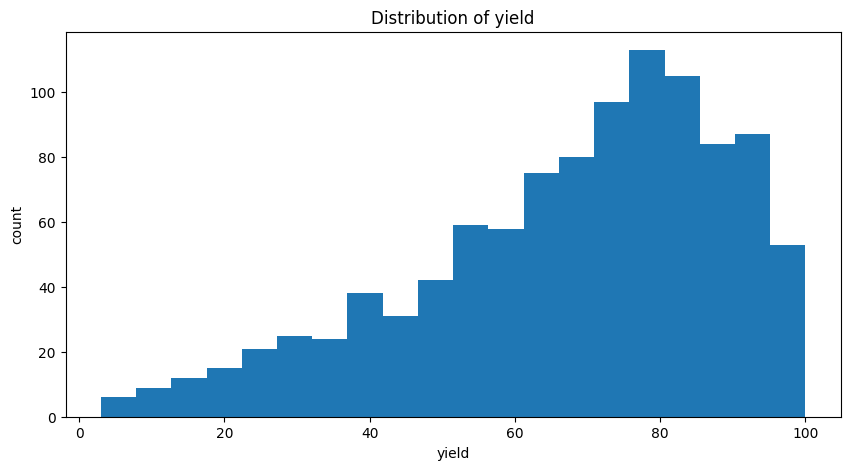

In [24]:
plot_yield_distribution(lit_data)

 The `yield` column contains the yield of the reaction in percentage. The distribution of the `yield` column is not normal, but it is skewed to the right. This can mean that the `yield` column is biased towards reactions with good-excellent performances.

 Let's now check the `exp_data` dataframe.

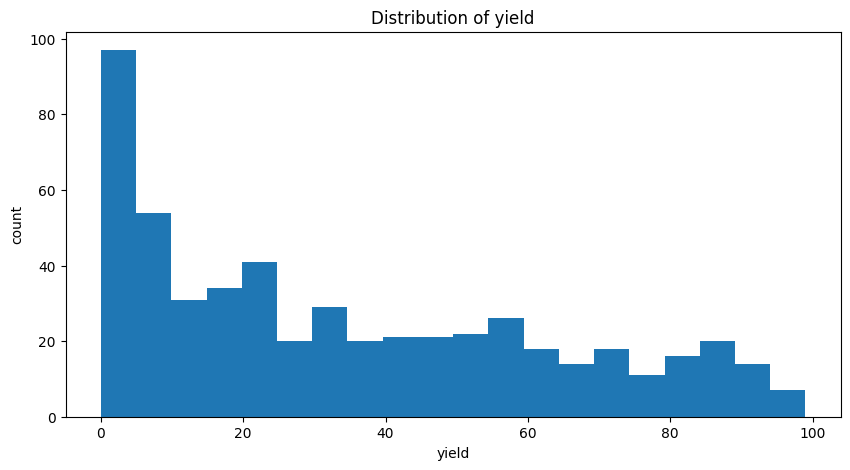

In [25]:
plot_yield_distribution(exp_data)

In this case the `yield` distribution in the `exp_data` dataframe is skewed to the left. This can mean that the `exp_data` dataframe is biased towards reactions with poor performances. By combining the two dataframe it is expected to have a more balanced distribution of the `yield` column.

Let's now combine the two dataframes and monitor the info for the final dataframe, including the yield distribution.

In [26]:
#combine the two datasets lit_data and exp_data into one
data = pd.concat([lit_data, exp_data], ignore_index=False)
data_details(data)

Shape of the dataframe is:  (1568, 12)
Data types of the dataframe are:  solvent_class        object
base_class           object
temperature           int64
ligand               object
pd_source            object
yield               float64
boronate             object
halide               object
ligand_smiles        object
pd_source_smiles     object
base_smiles          object
solvent_smiles       object
dtype: object
Null values in the dataframe are:  solvent_class       0
base_class          0
temperature         0
ligand              0
pd_source           0
yield               0
boronate            0
halide              0
ligand_smiles       0
pd_source_smiles    4
base_smiles         0
solvent_smiles      0
dtype: int64
Number of unique values in each column are:  solvent_class         3
base_class            2
temperature          21
ligand                8
pd_source            13
yield               136
boronate            298
halide              562
ligand_smiles         7
pd_s

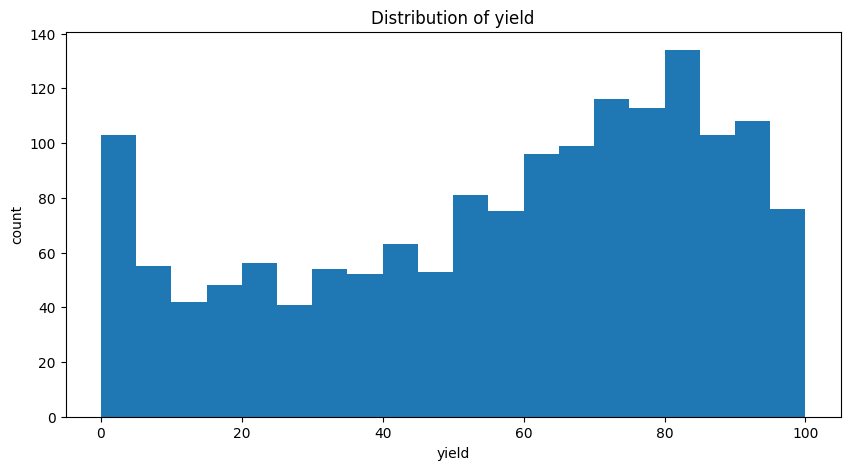

In [27]:
plot_yield_distribution(data)

Before proceeding with the next step of the project, null values should be removed from the dataframe. The following code removes the instances with `NaN`.

In [28]:
#remove instances with null values
data.dropna(inplace=True)
data_details(data)

Shape of the dataframe is:  (1564, 12)
Data types of the dataframe are:  solvent_class        object
base_class           object
temperature           int64
ligand               object
pd_source            object
yield               float64
boronate             object
halide               object
ligand_smiles        object
pd_source_smiles     object
base_smiles          object
solvent_smiles       object
dtype: object
Null values in the dataframe are:  solvent_class       0
base_class          0
temperature         0
ligand              0
pd_source           0
yield               0
boronate            0
halide              0
ligand_smiles       0
pd_source_smiles    0
base_smiles         0
solvent_smiles      0
dtype: int64
Number of unique values in each column are:  solvent_class         3
base_class            2
temperature          21
ligand                7
pd_source            11
yield               136
boronate            298
halide              560
ligand_smiles         7
pd_s

# 2. PCA and Clustering based on Chemical Similarity

In [29]:
#rdkit is a cheminformatics library that allows us to work with chemical structures
import rdkit
from rdkit import Chem
from rdkit import Chem, DataStructs
from rdkit.Chem import Descriptors,Crippen
from rdkit.Chem.Fingerprints import FingerprintMols
from rdkit.Chem import Draw
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from rdkit.Chem import AllChem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem import rdMolTransforms
from rdkit.Chem import rdMolAlign

#sklearn is a machine learning library that allows us to work with PCA, KMeans, StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#sciPy is a scientific computing library that allows us to work with statistical tests
import scipy.stats as stats
from scipy.stats import chi2_contingency

import seaborn as sns

In [30]:
data.head()

,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles
0,polar,phosphate,80,PPh3,Pd(PPh3)4,69.0,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O
1,polar,carbonate,100,PPh3,Pd(PPh3)4,3.0,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O
2,waterEther,phosphate,100,dppf,Pd(dppf)Cl2,3.0,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O
3,waterEther,carbonate,125,PPh3,Pd(PPh3)4,82.0,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O
4,polar,carbonate,140,PPh3,Pd(PPh3)4,91.0,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O


Performing PCA based on chemical similarities is essential because it can help reduce the dimensionality of the chemical data while preserving the underlying chemical structure and properties. In other words, it can help identify the most critical chemical features contributing to the observed variation in the data. PCA can be beneficial for chemical data since it can identify patterns and relationships among chemical descriptors that may not be apparent from raw data analysis. By reducing the dimensionality of the data, PCA can help simplify the interpretation of the results and facilitate the identification of relevant chemical features responsible for a particular behaviour or response. Furthermore, PCA can help identify groups of structurally similar chemicals that may share similar properties or reactivity. This can be useful for identifying new compounds that may have similar properties to known compounds or for identifying potential drug candidates based on their chemical structure and properties.

The following code performs PCA based on chemical similarities on the boronate, halide and ligand columns of the `lit_data` dataframe which contain the chemical SMILES of the corresponding compounds.

The approach is always the same:
1. create a list of rdkit molecules from the SMILES
2. calculate the descriptors for each molecule: molecular weight (MolWt), topological polar surface area (TPSA), number of rotatable bonds (nRotB), hydrogen bond donor and acceptor (HBD and HBA respectively)
3. PCA based on the chemical descriptors
4. Chose the number of components to keep by looking at the explained variance ratio
5. k-mean clustering based on the PCA components
6. Number of clusters based on the elbow method

### 1. Boronate

In [31]:
#for every smiles in the boronate column, create a list of rdkit molecules and calculate descriptors such as MolWt, TPSA, nRotB, HBD and HBA
def get_boronate_descriptors(x):
    boronate_smiles = x['boronate']
    boronate_mols = [Chem.MolFromSmiles(boronate_smiles)]
    boronate_descriptors = []
    for mol in boronate_mols:
        boronate_descriptors.append(Descriptors.MolWt(mol))
        boronate_descriptors.append(Descriptors.TPSA(mol))
        boronate_descriptors.append(Descriptors.NumRotatableBonds(mol))
        boronate_descriptors.append(Descriptors.NumHDonors(mol))
        boronate_descriptors.append(Descriptors.NumHAcceptors(mol))
    return boronate_descriptors
#apply the function to the data dataframe
data['boronate_descriptors'] = data.apply(get_boronate_descriptors, axis=1)

#store the results in a new dataframe and perform standardisation with standard scaler
boronate_descriptors = pd.DataFrame(data['boronate_descriptors'].values.tolist(), columns=['boronate_MolWt', 'boronate_TPSA', 'boronate_nRotB', 'boronate_HBD', 'boronate_HBA'])
boronate_descriptors.head()

#standardise the boronate descriptors
scaler = StandardScaler()
boronate_descriptors = scaler.fit_transform(boronate_descriptors)
boronate_descriptors = pd.DataFrame(boronate_descriptors, columns=['boronate_MolWt', 'boronate_TPSA', 'boronate_nRotB', 'boronate_HBD', 'boronate_HBA'])
boronate_descriptors.head()


,boronate_MolWt,boronate_TPSA,boronate_nRotB,boronate_HBD,boronate_HBA
0,-1.172994,-0.143248,-0.544217,0.649025,-0.510273
1,-0.657247,0.887773,-0.544217,1.653055,-0.510273
2,1.960913,3.384032,2.037648,2.657085,1.442583
3,0.692149,0.698415,0.316405,0.649025,0.140679
4,-1.106393,-0.984911,-0.544217,0.649025,-0.510273


In [32]:
#perform pca on the boronate descriptors
pca = PCA()
boronate_descriptors_pca = pca.fit_transform(boronate_descriptors)
boronate_descriptors_pca = pd.DataFrame(boronate_descriptors_pca, columns=['boronate_pc{}'.format(i+1) for i in range(boronate_descriptors_pca.shape[1])])
boronate_descriptors_pca.head()

,boronate_pc1,boronate_pc2,boronate_pc3,boronate_pc4,boronate_pc5
0,-1.348106,0.205249,-0.674944,-0.224016,-0.094695
1,-1.106087,1.032897,-1.154922,0.940700,-0.013707
2,2.545343,3.755877,-0.625409,2.643961,0.789272
3,0.504828,0.680531,-0.025184,0.874407,0.157457
4,-1.682647,-0.139120,-0.159878,-0.441732,0.317168


In [33]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.58742762 0.2121673  0.15135219 0.04004325 0.00900965]
1.0


<Figure size 800x600 with 0 Axes>

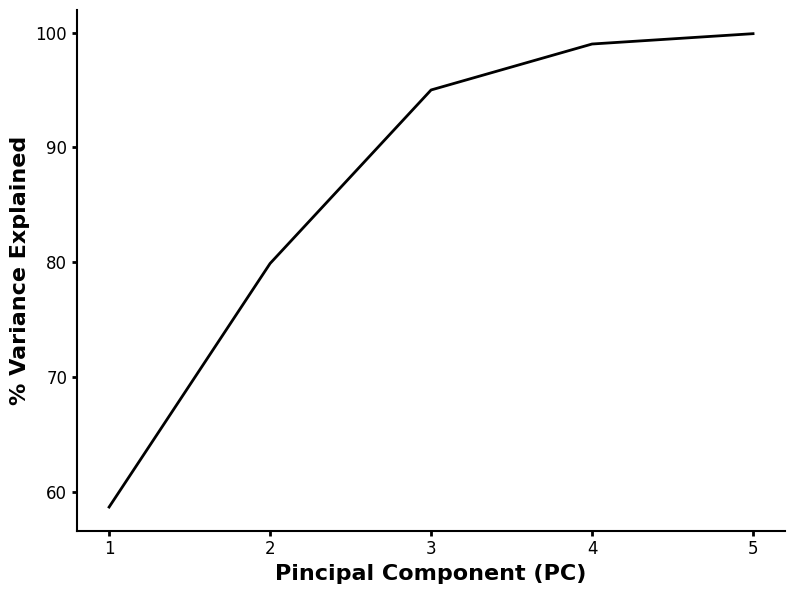

In [34]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

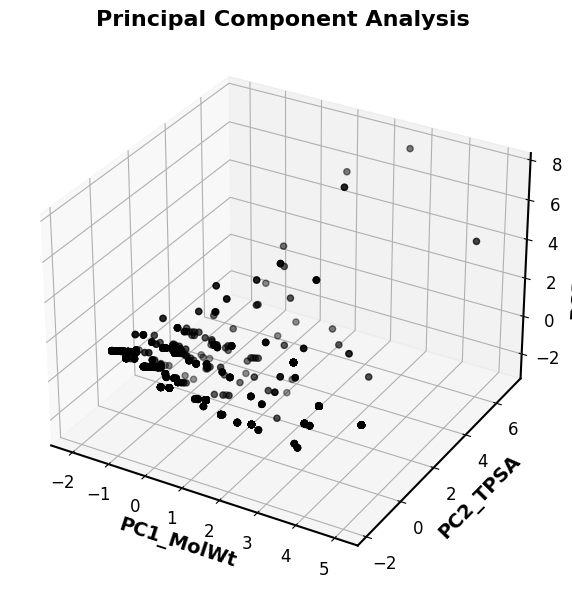

In [35]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(boronate_descriptors_pca['boronate_pc1'], boronate_descriptors_pca['boronate_pc2'], boronate_descriptors_pca['boronate_pc3'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1_MolWt',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2_TPSA',fontsize=14,fontweight='bold')
ax.set_zlabel ('PC3_nRotB',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [36]:
#normalise PC1, PC2 and PC3  and add them to the boronate_descriptors dataframe
boronate_descriptors_pca['boronate_pc1_norm'] = (boronate_descriptors_pca['boronate_pc1'] - boronate_descriptors_pca['boronate_pc1'].min()) / (boronate_descriptors_pca['boronate_pc1'].max() - boronate_descriptors_pca['boronate_pc1'].min())
boronate_descriptors_pca['boronate_pc2_norm'] = (boronate_descriptors_pca['boronate_pc2'] - boronate_descriptors_pca['boronate_pc2'].min()) / (boronate_descriptors_pca['boronate_pc2'].max() - boronate_descriptors_pca['boronate_pc2'].min())
boronate_descriptors_pca['boronate_pc3_norm'] = (boronate_descriptors_pca['boronate_pc3'] - boronate_descriptors_pca['boronate_pc3'].min()) / (boronate_descriptors_pca['boronate_pc3'].max() - boronate_descriptors_pca['boronate_pc3'].min())
boronate_descriptors_pca.head()

,boronate_pc1,boronate_pc2,boronate_pc3,boronate_pc4,boronate_pc5,boronate_pc1_norm,boronate_pc2_norm,boronate_pc3_norm
0,-1.348106,0.205249,-0.674944,-0.224016,-0.094695,0.102099,0.232285,0.186653
1,-1.106087,1.032897,-1.154922,0.940700,-0.013707,0.135986,0.326114,0.139483
2,2.545343,3.755877,-0.625409,2.643961,0.789272,0.647252,0.634813,0.191521
3,0.504828,0.680531,-0.025184,0.874407,0.157457,0.361543,0.286167,0.250508
4,-1.682647,-0.139120,-0.159878,-0.441732,0.317168,0.055257,0.193245,0.237271


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

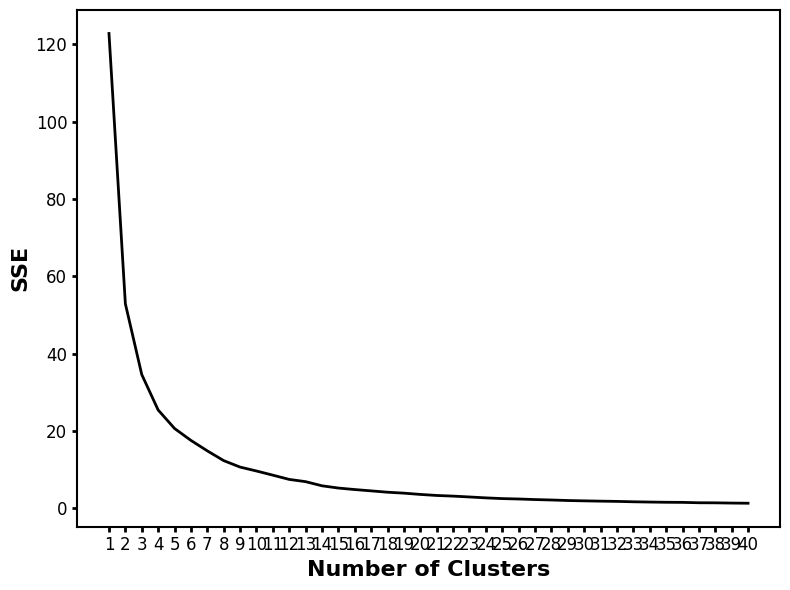

In [37]:
sse=[]
range_n_clusters = range(1,41)
#perform k-means clustering on the normalised boronate descriptors
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(boronate_descriptors_pca[['boronate_pc1_norm','boronate_pc2_norm','boronate_pc3_norm']])
    sse.append(kmeans.inertia_)

#elbow plot
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters,sse,'k-',linewidth=2)
plt.xticks(range_n_clusters)
plt.ylabel('SSE',fontsize=16,fontweight='bold')
plt.xlabel('Number of Clusters',fontsize=16,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

In [38]:
#perform k-means clustering on the normalised boronate descriptors with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(boronate_descriptors_pca[['boronate_pc1_norm','boronate_pc2_norm','boronate_pc3_norm']])
#add the cluster labels to the boronate_descriptors_pca dataframe
boronate_descriptors_pca['boronate_cluster'] = kmeans.labels_
boronate_descriptors_pca.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,boronate_pc1,boronate_pc2,boronate_pc3,boronate_pc4,boronate_pc5,boronate_pc1_norm,boronate_pc2_norm,boronate_pc3_norm,boronate_cluster
0,-1.348106,0.205249,-0.674944,-0.224016,-0.094695,0.102099,0.232285,0.186653,0
1,-1.106087,1.032897,-1.154922,0.940700,-0.013707,0.135986,0.326114,0.139483,0
2,2.545343,3.755877,-0.625409,2.643961,0.789272,0.647252,0.634813,0.191521,3
3,0.504828,0.680531,-0.025184,0.874407,0.157457,0.361543,0.286167,0.250508,1
4,-1.682647,-0.139120,-0.159878,-0.441732,0.317168,0.055257,0.193245,0.237271,0


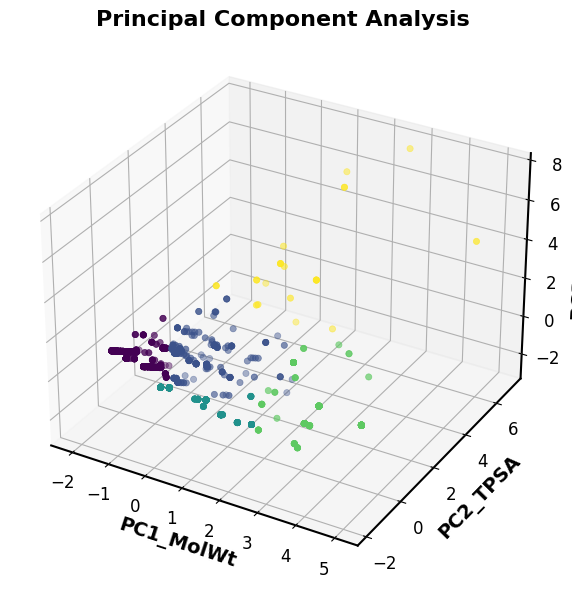

In [39]:
#plot the clusters
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(boronate_descriptors_pca['boronate_pc1'], boronate_descriptors_pca['boronate_pc2'], boronate_descriptors_pca['boronate_pc3'],c=boronate_descriptors_pca['boronate_cluster'],cmap='viridis',linewidth=0.5)
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1_MolWt',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2_TPSA',fontsize=14,fontweight='bold')
ax.set_zlabel ('PC3_nRotB',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

### 2. Halide

In [40]:
#for every smiles in the halide column, create a list of rdkit molecules and calculate descriptors such as MolWt, TPSA, nRotB, HBD and HBA
def get_halide_descriptors(x):
    halide_smiles = x['halide']
    halide_mols = [Chem.MolFromSmiles(halide_smiles)]
    halide_descriptors = []
    for mol in halide_mols:
        halide_descriptors.append(Descriptors.MolWt(mol))
        halide_descriptors.append(Descriptors.TPSA(mol))
        halide_descriptors.append(Descriptors.NumRotatableBonds(mol))
        halide_descriptors.append(Descriptors.NumHDonors(mol))
        halide_descriptors.append(Descriptors.NumHAcceptors(mol))
    return halide_descriptors

data['halide_descriptors'] = data.apply(get_halide_descriptors, axis=1)

#store the results in a new dataframe and perform standardisation with standard scaler
halide_descriptors = pd.DataFrame(data['halide_descriptors'].values.tolist(), columns=['halide_MolWt', 'halide_TPSA', 'halide_nRotB', 'halide_HBD', 'halide_HBA'])
halide_descriptors.head()

#standardise the halide descriptors
scaler = StandardScaler()
halide_descriptors = scaler.fit_transform(halide_descriptors)
halide_descriptors = pd.DataFrame(halide_descriptors, columns=['halide_MolWt', 'halide_TPSA', 'halide_nRotB', 'halide_HBD', 'halide_HBA'])
halide_descriptors.head()

,halide_MolWt,halide_TPSA,halide_nRotB,halide_HBD,halide_HBA
0,0.765199,-0.292468,0.104506,-0.630071,0.282633
1,1.074273,2.923381,-0.342070,2.315912,3.225624
2,0.225708,-0.086840,-0.342070,-0.630071,0.871231
3,0.179869,0.142074,0.104506,0.842920,0.282633
4,1.878625,2.239796,2.783961,-0.630071,2.048428


In [41]:
pca = PCA()
halide_descriptors_pca = pca.fit_transform(halide_descriptors)
halide_descriptors_pca = pd.DataFrame(halide_descriptors_pca, columns=['halide_pc{}'.format(i+1) for i in range(halide_descriptors_pca.shape[1])])
halide_descriptors_pca.head()

,halide_pc1,halide_pc2,halide_pc3,halide_pc4,halide_pc5
0,0.208925,0.883012,-0.266550,-0.490902,-0.153189
1,4.211287,-2.449067,-1.117843,-0.595028,-0.498828
2,0.192631,0.333063,-0.958444,-0.311756,-0.409495
3,0.589109,-0.496146,0.402866,-0.063449,-0.307113
4,4.046827,1.718737,-0.668247,0.781012,0.708519


In [42]:
print(pca.explained_variance_ratio_) 
print(sum(pca.explained_variance_ratio_))

[0.57287223 0.24742899 0.10731809 0.05617113 0.01620956]
1.0


<Figure size 800x600 with 0 Axes>

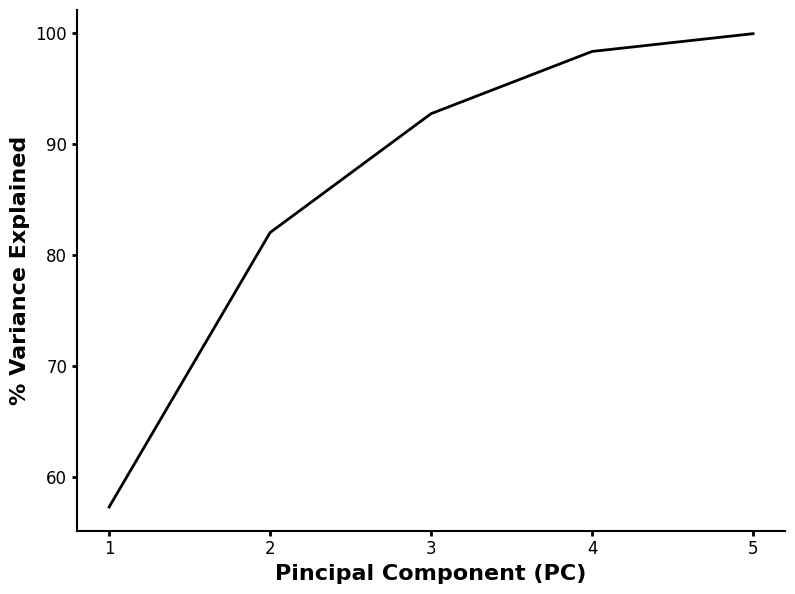

In [43]:
plt.rcParams['axes.linewidth'] = 1.5
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(8,6))

var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
plt.plot([i+1 for i in range(len(var))],var,'k-',linewidth=2)
plt.xticks([i+1 for i in range(len(var))])
plt.ylabel('% Variance Explained',fontsize=16,fontweight='bold')
plt.xlabel('Pincipal Component (PC)',fontsize=16,fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.tick_params ('both',width=2,labelsize=12)

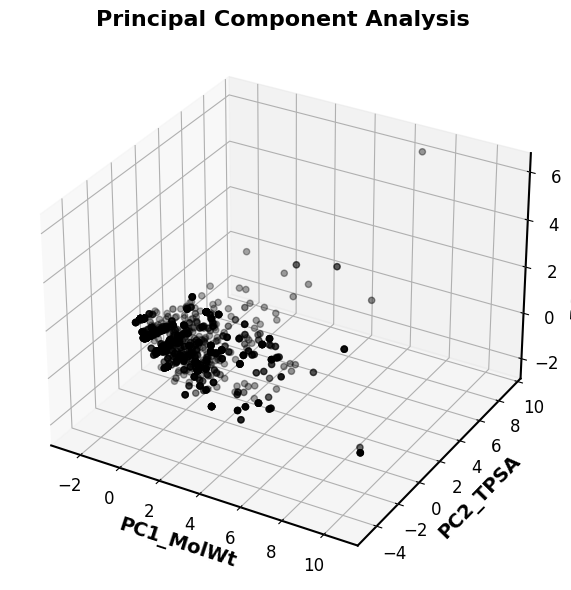

In [44]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(halide_descriptors_pca['halide_pc1'], halide_descriptors_pca['halide_pc2'], halide_descriptors_pca['halide_pc3'],'o',color='k')
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1_MolWt',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2_TPSA',fontsize=14,fontweight='bold')
ax.set_zlabel ('PC3_nRotB',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

In [45]:
#normalise PC1, PC2 and PC3  and add them to the halide_descriptors dataframe
halide_descriptors_pca['halide_pc1_norm'] = (halide_descriptors_pca['halide_pc1'] - halide_descriptors_pca['halide_pc1'].min()) / (halide_descriptors_pca['halide_pc1'].max() - halide_descriptors_pca['halide_pc1'].min())
halide_descriptors_pca['halide_pc2_norm'] = (halide_descriptors_pca['halide_pc2'] - halide_descriptors_pca['halide_pc2'].min()) / (halide_descriptors_pca['halide_pc2'].max() - halide_descriptors_pca['halide_pc2'].min())
halide_descriptors_pca['halide_pc3_norm'] = (halide_descriptors_pca['halide_pc3'] - halide_descriptors_pca['halide_pc3'].min()) / (halide_descriptors_pca['halide_pc3'].max() - halide_descriptors_pca['halide_pc3'].min())
halide_descriptors_pca.head()

,halide_pc1,halide_pc2,halide_pc3,halide_pc4,halide_pc5,halide_pc1_norm,halide_pc2_norm,halide_pc3_norm
0,0.208925,0.883012,-0.266550,-0.490902,-0.153189,0.209179,0.398509,0.237168
1,4.211287,-2.449067,-1.117843,-0.595028,-0.498828,0.512830,0.160460,0.136224
2,0.192631,0.333063,-0.958444,-0.311756,-0.409495,0.207943,0.359220,0.155125
3,0.589109,-0.496146,0.402866,-0.063449,-0.307113,0.238023,0.299980,0.316545
4,4.046827,1.718737,-0.668247,0.781012,0.708519,0.500353,0.458214,0.189536


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

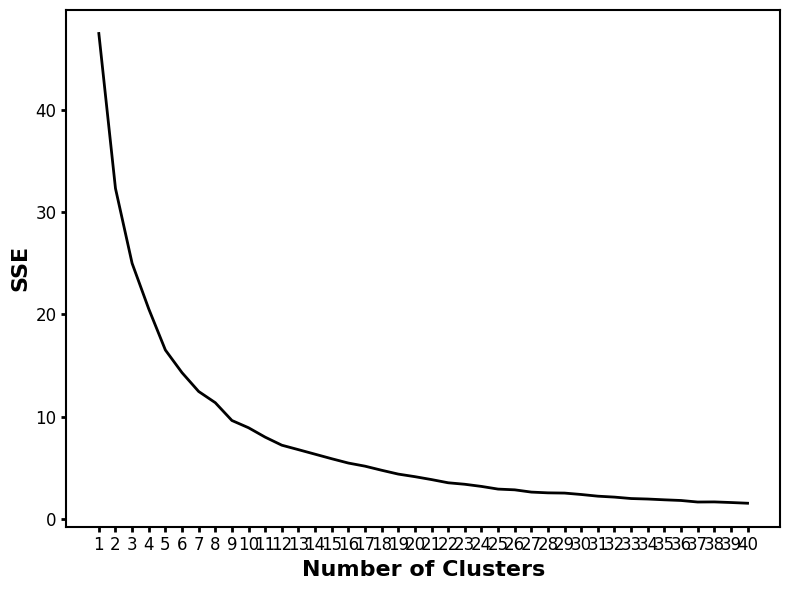

In [46]:
sse=[]
range_n_clusters = range(1,41)
#perform k-means clustering on the normalised boronate descriptors
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(halide_descriptors_pca[['halide_pc1_norm','halide_pc2_norm','halide_pc3_norm']])
    sse.append(kmeans.inertia_)

#plot the elbow plot
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters,sse,'k-',linewidth=2)
plt.xticks(range_n_clusters)
plt.ylabel('SSE',fontsize=16,fontweight='bold')
plt.xlabel('Number of Clusters',fontsize=16,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

In [47]:
#perform k-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(halide_descriptors_pca[['halide_pc1_norm','halide_pc2_norm','halide_pc3_norm']])
halide_descriptors_pca['halide_cluster'] = kmeans.labels_
halide_descriptors_pca.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,halide_pc1,halide_pc2,halide_pc3,halide_pc4,halide_pc5,halide_pc1_norm,halide_pc2_norm,halide_pc3_norm,halide_cluster
0,0.208925,0.883012,-0.266550,-0.490902,-0.153189,0.209179,0.398509,0.237168,0
1,4.211287,-2.449067,-1.117843,-0.595028,-0.498828,0.512830,0.160460,0.136224,2
2,0.192631,0.333063,-0.958444,-0.311756,-0.409495,0.207943,0.359220,0.155125,0
3,0.589109,-0.496146,0.402866,-0.063449,-0.307113,0.238023,0.299980,0.316545,4
4,4.046827,1.718737,-0.668247,0.781012,0.708519,0.500353,0.458214,0.189536,2


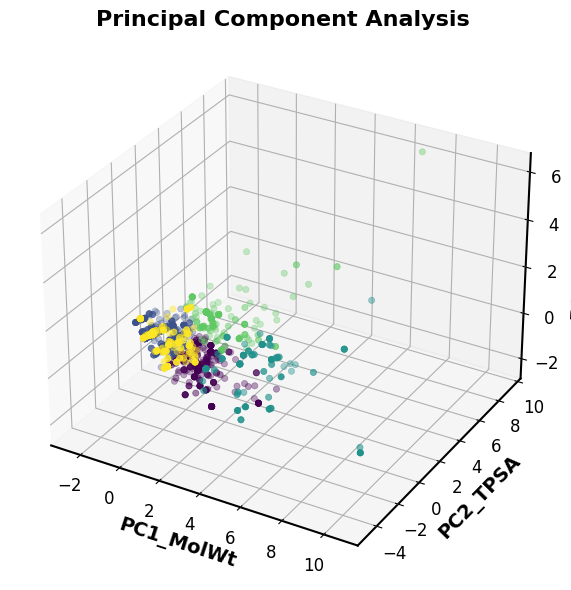

In [48]:
#plot the clusters
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')

ax.scatter3D(halide_descriptors_pca['halide_pc1'], halide_descriptors_pca['halide_pc2'], halide_descriptors_pca['halide_pc3'], c=halide_descriptors_pca['halide_cluster'], cmap='viridis', linewidth=0.5)
ax.set_title ('Principal Component Analysis',fontsize=16,fontweight='bold',family='sans-serif')
ax.set_xlabel ('PC1_MolWt',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2_TPSA',fontsize=14,fontweight='bold')
ax.set_zlabel ('PC3_nRotB',fontsize=14,fontweight='bold')

plt.tick_params ('both',width=2,labelsize=12)

plt.tight_layout()
plt.show()

### 3. Ligand
The ligand is one of the most important factors which affect the yield of the reaction. So, it is worth to investigate the ligand column in more detail and then to study the dependencies of boronate and halide clusters.

In [49]:
#make pairs of boronate and halide clusters based on the number of compounds in each cluster
cluster_pairs = []
for i in range(0,5):
    for j in range(0,5):
        cluster_pairs.append([i,j])
cluster_pairs

#remove the cluster pairs with no compounds
cluster_pairs = cluster_pairs[1:]
cluster_pairs

#count the number of pairs of boronate and halide clusters
len(cluster_pairs)

24

The following code displays the molecules corresponding to all the unique values for `ligand`.

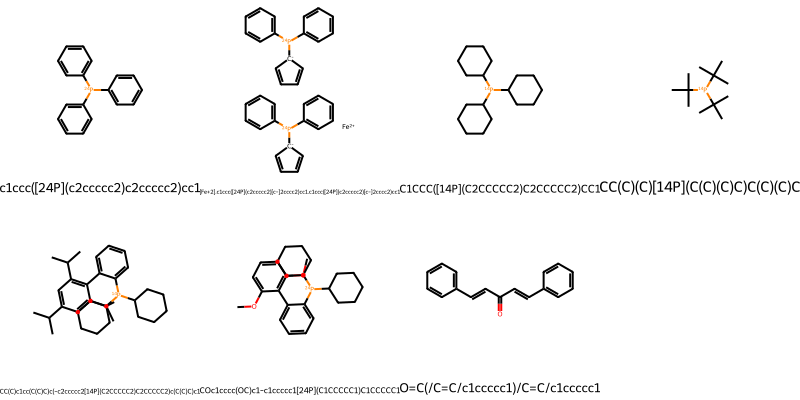

In [50]:
#for every smiles in ligand_smiles, create a list of rdkit molecules and visualise them as a grid
def mol_grid(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    return Draw.MolsToGridImage(mols, molsPerRow=4, subImgSize=(200,200), legends=[Chem.MolToSmiles(mol) for mol in mols])

#visualise the unique compounds in ligand_smiles column of data dataframe
mol_grid(data['ligand_smiles'].unique())


In [51]:
#for every smiles in the halide column, create a list of rdkit molecules and calculate descriptors such as MolWt, TPSA, nRotB, HBD and HBA
def get_ligand_descriptors(x):
    ligand_smiles = x['ligand_smiles']
    ligand_mols = [Chem.MolFromSmiles(ligand_smiles)]
    ligand_descriptors = []
    for mol in ligand_mols:
        ligand_descriptors.append(Descriptors.MolWt(mol))
        ligand_descriptors.append(Descriptors.TPSA(mol))
        ligand_descriptors.append(Descriptors.NumRotatableBonds(mol))
        ligand_descriptors.append(Descriptors.NumHDonors(mol))
        ligand_descriptors.append(Descriptors.NumHAcceptors(mol))
    return ligand_descriptors

data['ligand_descriptors'] = data.apply(get_ligand_descriptors, axis=1)

#store the results in a new dataframe and perform standardisation with standard scaler
ligand_descriptors = pd.DataFrame(data['ligand_descriptors'].values.tolist(), columns=['ligand_MolWt', 'ligand_TPSA', 'ligand_nRotB', 'ligand_HBD', 'ligand_HBA'])
ligand_descriptors.head()

#standardise the ligand descriptors
scaler = StandardScaler()
ligand_descriptors = scaler.fit_transform(ligand_descriptors)
ligand_descriptors = pd.DataFrame(ligand_descriptors, columns=['ligand_MolWt', 'ligand_TPSA', 'ligand_nRotB', 'ligand_HBD', 'ligand_HBA'])
ligand_descriptors.head()

,ligand_MolWt,ligand_TPSA,ligand_nRotB,ligand_HBD,ligand_HBA
0,-0.469050,-0.358241,-0.383595,0.0,-0.352304
1,-0.469050,-0.358241,-0.383595,0.0,-0.352304
2,2.770819,-0.358241,1.372336,0.0,-0.352304
3,-0.469050,-0.358241,-0.383595,0.0,-0.352304
4,-0.469050,-0.358241,-0.383595,0.0,-0.352304


In [52]:
#perform PCA on the ligand descriptors
pca = PCA(n_components=3)
ligand_descriptors_pca = pca.fit_transform(ligand_descriptors)
ligand_descriptors_pca = pd.DataFrame(ligand_descriptors_pca, columns=['ligand_pc1', 'ligand_pc2', 'ligand_pc3'])
ligand_descriptors_pca.head()

,ligand_pc1,ligand_pc2,ligand_pc3
0,-0.778845,-0.087560,-0.070498
1,-0.778845,-0.087560,-0.070498
2,1.655090,2.503804,0.882445
3,-0.778845,-0.087560,-0.070498
4,-0.778845,-0.087560,-0.070498


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

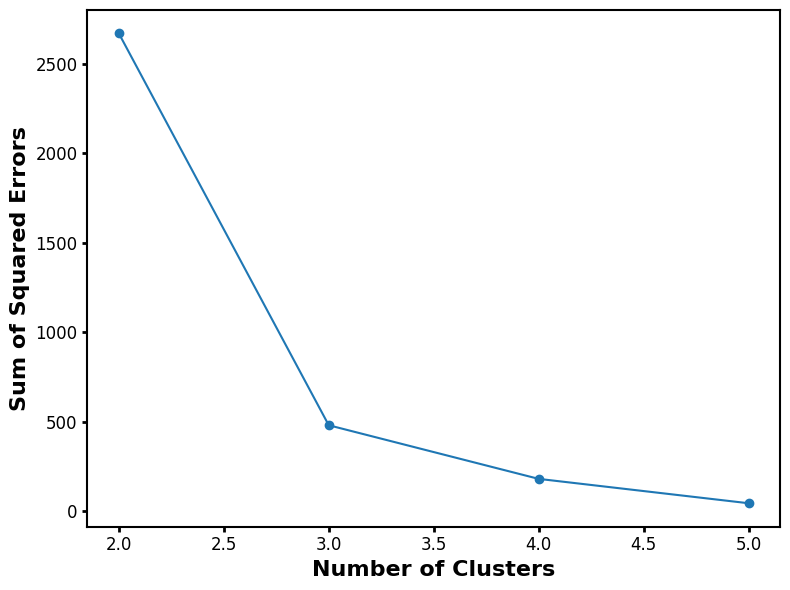

In [53]:
#perform k-means clustering with a range of clusters between 2 and 5
range_n_clusters = [2,3,4,5]
sse = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(ligand_descriptors_pca[['ligand_pc1','ligand_pc2','ligand_pc3']])
    sse.append(kmeans.inertia_)

#plot the sum of squared errors for each number of clusters
plt.figure(figsize=(8,6))
plt.plot(range_n_clusters, sse, marker='o')
plt.xlabel('Number of Clusters',fontsize=16,fontweight='bold')
plt.ylabel('Sum of Squared Errors',fontsize=16,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

In [54]:
#perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(ligand_descriptors_pca[['ligand_pc1','ligand_pc2','ligand_pc3']])
ligand_descriptors_pca['ligand_cluster'] = kmeans.labels_
ligand_descriptors_pca.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ligand_pc1,ligand_pc2,ligand_pc3,ligand_cluster
0,-0.778845,-0.087560,-0.070498,0
1,-0.778845,-0.087560,-0.070498,0
2,1.655090,2.503804,0.882445,2
3,-0.778845,-0.087560,-0.070498,0
4,-0.778845,-0.087560,-0.070498,0


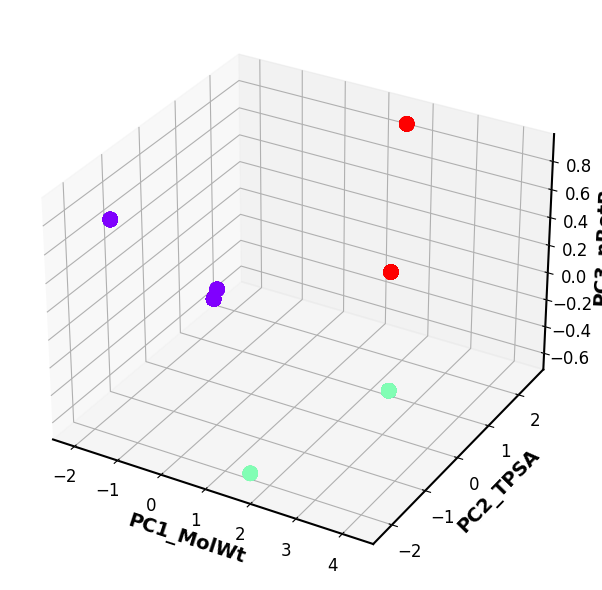

In [55]:
#plot the 3D scatter plot of the ligand descriptors
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ligand_descriptors_pca['ligand_pc1'], ligand_descriptors_pca['ligand_pc2'], ligand_descriptors_pca['ligand_pc3'], c=ligand_descriptors_pca['ligand_cluster'], cmap='rainbow', s=100, alpha=0.5)
ax.set_xlabel ('PC1_MolWt',fontsize=14,fontweight='bold')
ax.set_ylabel ('PC2_TPSA',fontsize=14,fontweight='bold')
ax.set_zlabel ('PC3_nRotB',fontsize=14,fontweight='bold')
ax.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

In [56]:
#add the ligand cluster to the data dataframe
data['ligand_cluster'] = ligand_descriptors_pca['ligand_cluster']
data['boronate_cluster'] = boronate_descriptors_pca['boronate_cluster']
data['halide_cluster'] = halide_descriptors_pca['halide_cluster']
data.head()

,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles,boronate_descriptors,halide_descriptors,ligand_descriptors,ligand_cluster,boronate_cluster,halide_cluster
0,polar,phosphate,80,PPh3,Pd(PPh3)4,69.0,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O,"[122.91999999999997, 53.35, 1, 2, 3]","[378.995, 27.05, 2, 0, 3]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,0
1,polar,carbonate,100,PPh3,Pd(PPh3)4,3.0,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,"[161.957, 69.14, 1, 3, 3]","[413.2480000000001, 108.53, 1, 2, 8]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,2
2,waterEther,phosphate,100,dppf,Pd(dppf)Cl2,3.0,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O,"[360.12600000000003, 107.37, 4, 4, 6]","[319.206, 32.260000000000005, 1, 0, 4]","[540.5117000000001, 0.0, 6, 0, 0]",2,3,0
3,waterEther,carbonate,125,PPh3,Pd(PPh3)4,82.0,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O,"[264.093, 66.24000000000001, 2, 2, 4]","[314.12600000000015, 38.06, 2, 1, 3]","[255.35235000000003, 0.0, 3, 0, 0]",0,1,4
4,polar,carbonate,140,PPh3,Pd(PPh3)4,91.0,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,"[127.96099999999998, 40.46, 1, 2, 3]","[502.39000000000027, 91.21, 8, 0, 6]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,2


### Clusters Relationship
Let's now study the relationships between the clusters of boronate, halide and ligand. This could help on further reduce the dimensionality of the data and perform the analysis based on chemical pairs in a more efficient way.

In [57]:
#check the number of compounds in each cluster based on ligand_cluster, boronate_cluster and halide_cluster
data.groupby(['ligand_cluster','boronate_cluster','halide_cluster']).size()

ligand_cluster  boronate_cluster  halide_cluster
0               0                 0                 248
                                  1                 394
                                  2                 111
                                  3                 116
                                  4                 154
                1                 0                  87
                                  1                 129
                                  2                  45
                                  3                  53
                                  4                  50
                2                 4                   2
                3                 0                   4
                                  1                   6
                                  2                   6
                                  3                   2
                                  4                   6
                4                 0                   2

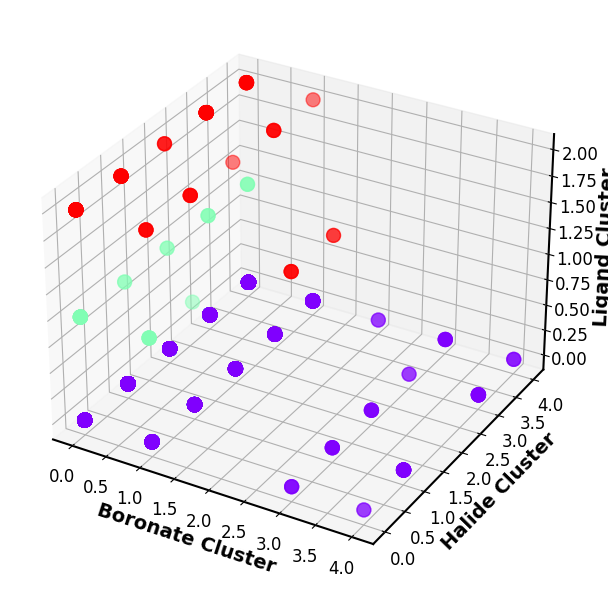

In [58]:
#3D plot of the pair of boronate and halide clusters in relation to the ligand cluster
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['boronate_cluster'], data['halide_cluster'], data['ligand_cluster'], c=data['ligand_cluster'], cmap='rainbow', s=100, alpha=0.5)
ax.set_xlabel ('Boronate Cluster',fontsize=14,fontweight='bold')
ax.set_ylabel ('Halide Cluster',fontsize=14,fontweight='bold')
ax.set_zlabel ('Ligand Cluster',fontsize=14,fontweight='bold')
ax.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

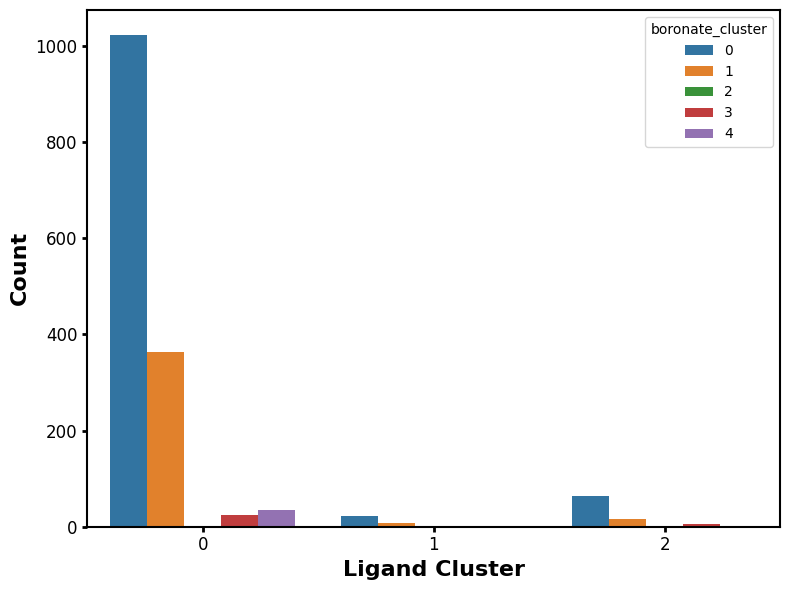

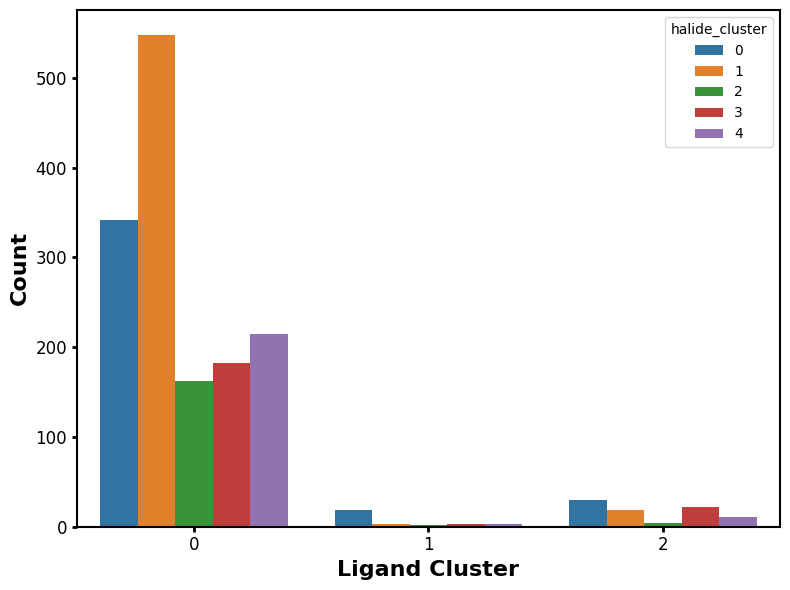

In [59]:
#plot the pair of boronate and halide clusters in relation to the ligand cluster
plt.figure(figsize=(8,6))
sns.countplot(x='ligand_cluster', hue='boronate_cluster', data=data)
plt.xlabel('Ligand Cluster',fontsize=16,fontweight='bold')
plt.ylabel('Count',fontsize=16,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x='ligand_cluster', hue='halide_cluster', data=data)
plt.xlabel('Ligand Cluster',fontsize=16,fontweight='bold')
plt.ylabel('Count',fontsize=16,fontweight='bold')
plt.tick_params ('both',width=2,labelsize=12)
plt.tight_layout()

In [60]:
#perform a chi-squared test to determine if the boronate and halide clusters are independent of the ligand cluster
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['ligand_cluster'], data['boronate_cluster']))
print('p-value for boronate cluster: ', p)

chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['ligand_cluster'], data['halide_cluster']))
print('p-value for halide cluster: ', p)

#perform a chi-squared test to determine if the boronate and halide clusters are independent of each other
chi2, p, dof, ex = chi2_contingency(pd.crosstab(data['boronate_cluster'], data['halide_cluster']))
print('p-value for boronate and halide clusters: ', p)

p-value for boronate cluster:  0.02758202806522414
p-value for halide cluster:  7.332722693415742e-08
p-value for boronate and halide clusters:  0.0005443661622833653


The hypotheses of independency between the three clusters is false (p-values < 0.05).

The first step is to classify the reagent-pairs in the dataset. The reagent-pairs are the combinations of the chemicals which are used in the chemical reactions. The reagent-pairs are classified in the following way:

In [61]:
#reagent-pairs classification
#perform k-means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(data[['boronate_cluster','halide_cluster']])
data['reagent_pair_cluster'] = kmeans.labels_
data.head()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,solvent_class,base_class,temperature,ligand,pd_source,yield,boronate,halide,ligand_smiles,pd_source_smiles,base_smiles,solvent_smiles,boronate_descriptors,halide_descriptors,ligand_descriptors,ligand_cluster,boronate_cluster,halide_cluster,reagent_pair_cluster
0,polar,phosphate,80,PPh3,Pd(PPh3)4,69.0,OB(O)C1=CC=NC=C1,COC1=CC=C(C=C1)N1N=C(Br)C=C1I,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=P([O-])([O-])[O-].[K+].[K+].[K+],CN(C)C=O.O,"[122.91999999999997, 53.35, 1, 2, 3]","[378.995, 27.05, 2, 0, 3]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,0,0
1,polar,carbonate,100,PPh3,Pd(PPh3)4,3.0,OB(O)C1=CN=C2NC=CC2=C1,NC1=NC2=C(CC(CC2)N2N=C(I)C3=C2N=CN=C3N)S1,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,"[161.957, 69.14, 1, 3, 3]","[413.2480000000001, 108.53, 1, 2, 8]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,2,1
2,waterEther,phosphate,100,dppf,Pd(dppf)Cl2,3.0,CCNC(=O)NC1=CC(C2=NC(=CS2)C(F)(F)F)=C(C=N1)B(O)O,CN1CC2CC(C1)N2C1=C(Br)C=C2N=CC=CC2=N1,[Fe++].C1=C[C-](C=C1)[24P](c1ccccc1)c1ccccc1.C...,[Fe].Cl[Pd]Cl.[CH]1[CH][CH][C]([CH]1)P(c2ccccc...,O=P([O-])([O-])[O-].[K+].[K+].[K+],O1CCOCC1.O,"[360.12600000000003, 107.37, 4, 4, 6]","[319.206, 32.260000000000005, 1, 0, 4]","[540.5117000000001, 0.0, 6, 0, 0]",2,3,0,2
3,waterEther,carbonate,125,PPh3,Pd(PPh3)4,82.0,CC1=C(C=CC=C1)C1=C2C=CC(=CC2=CN=N1)B(O)O,CC1=C(I)C2=C(C=C1)C(NC1CC1)=NO2,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],O1CCOCC1.O,"[264.093, 66.24000000000001, 2, 2, 4]","[314.12600000000015, 38.06, 2, 1, 3]","[255.35235000000003, 0.0, 3, 0, 0]",0,1,4,1
4,polar,carbonate,140,PPh3,Pd(PPh3)4,91.0,OB(O)C1=CC=CS1,CCCCCCn1c2cc(Br)c([N+](=O)[O-])cc2c2cc([N+](=O...,c1ccc(cc1)[24P](c1ccccc1)c1ccccc1,[Pd].C1=CC=C(C=C1)P(C2=CC=CC=C2)C3=CC=CC=C3.C1...,O=C([O-])[O-].[Na+].[Na+],CN(C)C=O.O,"[127.96099999999998, 40.46, 1, 2, 3]","[502.39000000000027, 91.21, 8, 0, 6]","[255.35235000000003, 0.0, 3, 0, 0]",0,0,2,1


# 3. Suzuki-Miyaura Coupling Reaction Prediction - Regression Approach

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [63]:
#make a new dataframe which will be the input features for the machine learning model
X_init = data[['solvent_class', 'base_class', 'temperature', 'ligand_cluster', 'reagent_pair_cluster']]
y = data[['yield']]

I have to convert `solvent_class` and `base_class` to numerical values. The following code convert the two columns into dummy variables.

In [64]:
#convert solvent_class and base_class to dummy variables
X = pd.get_dummies(X_init, columns=['solvent_class', 'base_class'])
X.head()

,temperature,ligand_cluster,reagent_pair_cluster,solvent_class_polar,solvent_class_polarAromatic,solvent_class_waterEther,base_class_carbonate,base_class_phosphate
0,80,0,0,1,0,0,0,1
1,100,0,1,1,0,0,1,0
2,100,2,2,0,0,1,0,1
3,125,0,1,0,0,1,1,0
4,140,0,1,1,0,0,1,0


### Test-Train Split and Models to Evaluate

In [65]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#define a list of regression models to evaluate
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree', DecisionTreeRegressor()))
models.append(('Support Vector Machine', SVR()))


### Hyperparameters Tuning

In [66]:
#define hyperparameters to tune for each model using GridSearchCV
param_grid = {'Linear Regression': {},
                'Decision Tree': {'criterion': ['mse', 'friedman_mse', 'mae'], 'splitter': ['best', 'random']},
                'Support Vector Machine': {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': [0.1, 1, 10, 100, 1000]}}

#loop through the models and hyperparameters to find the best model
for name, model in models:
    print(name)
    print('----------------')
    grid = GridSearchCV(model, param_grid[name], cv=5, scoring='neg_mean_squared_error')
    grid.fit(X_train, y_train)
    print('Best parameters: ', grid.best_params_)
    print('Best score: ', grid.best_score_)
    print('----------------')
    

Linear Regression
----------------
Best parameters:  {}
Best score:  -800.0518261529941
----------------
Decision Tree
----------------
Best parameters:  {'criterion': 'friedman_mse', 'splitter': 'best'}
Best score:  -612.5287658030918
----------------
Support Vector Machine
----------------


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-package

Best parameters:  {'C': 1000, 'kernel': 'rbf'}
Best score:  -773.6006363870008
----------------


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/uti

### Models Evaluation

In [67]:
#evaluate the performance of each model on the test set
for name, model in models:
    print(name)
    print('----------------')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Mean squared error: ', mean_squared_error(y_test, y_pred))
    print('R2 score: ', r2_score(y_test, y_pred))
    print('----------------')

Linear Regression
----------------
Mean squared error:  733.630710472489
R2 score:  0.1139316250880219
----------------
Decision Tree
----------------
Mean squared error:  526.4544829001851
R2 score:  0.3641560236374737
----------------
Support Vector Machine
----------------
Mean squared error:  869.066800281533
R2 score:  -0.049646090905142604
----------------


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 4. Conclusions

Based on this simple study, it seems that the best model is Decision Tree, with the maximum R-squared of only 0.36. There could be several reasons for this. First, I mentioned that I am using only a few chemical descriptors obtained from SMILES calculations. It is possible that these descriptors are not sufficient to fully capture the complexity of the chemical reactions I am studying. Using a combination of DFT calculations and other experimental characterization data could improve the accuracy of my model. Second, I also mentioned that I have a relatively small dataset. It is possible that my model is not learning the underlying patterns in the data due to a lack of training examples. Accessing a larger dataset could help improve the accuracy of my model. Finally, I noted that further studies are ongoing to determine which model is best suited for my application. It is important to continue exploring different machine learning models and assessing their performance on my dataset to determine the best approach for my specific problem.

In conclusion, it is likely that using a combination of DFT calculations and experimental characterization data, accessing a larger dataset, and continued exploration of different machine learning models will be necessary to improve the accuracy of my model.

What are the strengths and innovations of the approach:
1. Can it be worth to train models on reagent-pairs instead of single chemicals?
2. Making a dataset from literature reviews is a good idea, but it is worth to make a dataset from experimental data too.

This repository contains the code and the data used for the "Required activity 25.3 Portfolio project on optimising a model for real-life data (Capstone Project)" of the Imperial College Professional Certificate in Machine Learning and Artificial Intelligence course (cohort September 2022).